___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,6]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder

# from scipy.stats import skew

# from sklearn.model_selection import cross_validate

In [ ]:
## Ingest Data from links below and make a dataframe
soldiers_male = "https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr"
soldiers_female = "https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq"

In [ ]:
df_male = pd.read_csv(soldiers_male, encoding= 'ISO-8859-1', low_memory=False)
df_female = pd.read_csv(soldiers_female, encoding= 'ISO-8859-1', low_memory=False)


In [ ]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [ ]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [ ]:
df_male.shape, df_female.shape

((4082, 108), (1986, 108))

In [ ]:
df_male.columns != df_female.columns, (df_male.columns != df_female.columns).sum()

(array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]), 1)

In [ ]:
df_female.rename({'SubjectId':'subjectid'},axis = 1, inplace = True)

In [ ]:
(df_male.columns != df_female.columns).sum()

0

In [ ]:
df = df_male.append(df_female, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [ ]:
(df_male.shape[0] + df_female.shape[0]), df.shape

(6068, (6068, 108))

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


## Explore Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to writingpreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [ ]:
df.nunique().sort_values()

gender                               2
writingpreference                    3
branch                               3
component                            3
dodrace                              7
installation                        12
earprotrusion                       22
earbreadth                          22
heightin                            29
earlength                           36
bimalleolarbreadth                  37
handbreadth                         38
age                                 42
heelbreadth                         42
subjectnumericrace                  44
tragiontopofhead                    46
lateralmalleolusheight              47
headbreadth                         48
footbreadthhorizontal               49
palmlength                          50
bizygomaticbreadth                  50
headlength                          55
mentonsellionlength                 55
interpupillarybreadth               56
shoulderlength                      78
wristcircumference       

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

ethnicity               4647
subjectid                  0
radialestylionlength       0
thighcircumference         0
tenthribheight             0
dtype: int64

In [ ]:
df.ethnicity.value_counts(dropna=False)

NaN                                                   4647
Mexican                                                357
Puerto Rican                                           183
Caribbean Islander                                     124
Filipino                                                67
Cherokee                                                65
Korean                                                  53
Dominican                                               32
Chinese                                                 26
Japanese                                                22
Vietnamese                                              21
Colombian                                               17
Cuban                                                   17
Arab or Middle Eastern                                  17
Salvadoran                                              16
East/Asian Indian                                       13
Samoan                                                  

In [ ]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [ ]:
df = df[["dodrace"]].join(df.drop(["dodrace"], axis=1))

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
(df.subjectnumericrace==df.dodrace).value_counts()

True     5262
False     806
dtype: int64

In [ ]:
((df.subjectnumericrace==df.dodrace)>8).sum()

0

In [ ]:
df[df["subjectnumericrace"]>8][["subjectnumericrace","dodrace"]]

,subjectnumericrace,dodrace
10,351,1
27,61,1
36,61,1
56,28,2
71,28,2
...,...,...
6033,231,2
6039,251,2
6040,31,3
6048,51,1


In [ ]:
df.subjectnumericrace.unique()

array([    1,     2,   351,     3,    61,     4,    28,     5,    21,
          41,    31,   641,    23,     8,   251,    38,     6,    51,
          18,    64,   318,    63,    25,    43,   423,    35,   425,
         235,   358,    62,    42,   451,   238,  4251,   431,  2518,
         218,   231,   428,   651,   631,    48,  2351, 42351])

In [ ]:
df.subjectnumericrace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: subjectnumericrace, dtype: int64

**Drop columns**

In [ ]:
cat = df.select_dtypes("object").columns
cat

Index(['gender', 'date', 'installation', 'component', 'branch', 'primarymos',
       'subjectsbirthlocation', 'ethnicity', 'writingpreference'],
      dtype='object')

In [ ]:
for columns in cat:
  if df[columns].nunique() > 3:
    print(f"{columns}: unique value --> {df[columns].nunique()}")

date: unique value --> 253
installation: unique value --> 12
primarymos: unique value --> 285
subjectsbirthlocation: unique value --> 152
ethnicity: unique value --> 209


In [ ]:
for columns in cat:
  if df[columns].nunique() > 3:
    df.drop([columns], axis=1, inplace=True)
df.select_dtypes("object").columns

Index(['gender', 'component', 'branch', 'writingpreference'], dtype='object')

In [ ]:
df.select_dtypes("object").columns

Index(['gender', 'component', 'branch', 'writingpreference'], dtype='object')

In [ ]:
df.shape

(6068, 103)

In [ ]:
df.isnull().sum().sort_values()

dodrace                           0
sleeveoutseam                     0
sleevelengthspinewrist            0
sittingheight                     0
shoulderlength                    0
shoulderelbowlength               0
shouldercircumference             0
radialestylionlength              0
poplitealheight                   0
palmlength                        0
overheadfingertipreachsitting     0
span                              0
neckcircumferencebase             0
mentonsellionlength               0
lowerthighcircumference           0
lateralmalleolusheight            0
lateralfemoralepicondyleheight    0
kneeheightsitting                 0
kneeheightmidpatella              0
interscyeii                       0
interscyei                        0
interpupillarybreadth             0
iliocristaleheight                0
neckcircumference                 0
hipbreadthsitting                 0
stature                           0
tenthribheight                    0
heightin                    

### The Examination of Target Variable

In [ ]:
df.shape

(6068, 103)

In [ ]:
df['dodrace'].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [ ]:
df.drop(df[df['dodrace'] == 8].index, inplace = True)
## gözlem sayısı 8 classı için çok az

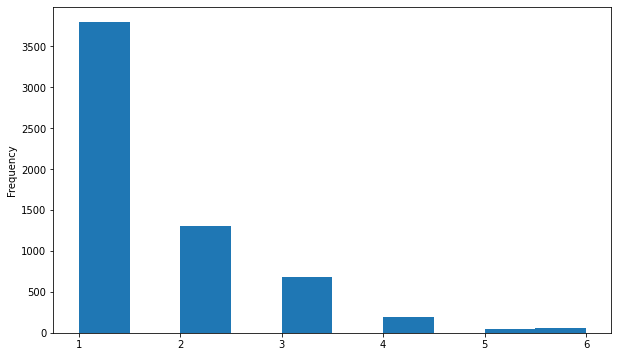

In [ ]:
df['dodrace'].plot(kind='hist')

In [ ]:
num_columns= df.drop(['dodrace'], axis=1).select_dtypes('number').columns

cat_columns = df.select_dtypes('object').columns

print(num_columns, end="\n\n")
print(cat_columns)

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbre

In [ ]:
df["weightlbs"].describe()

count    6065.000000
mean      174.748887
std        33.696938
min         0.000000
25%       150.000000
50%       173.000000
75%       196.000000
max       321.000000
Name: weightlbs, dtype: float64

In [ ]:
df["weightlbs"].value_counts().index.sort_values()

Int64Index([  0,  86,  88,  90,  95,  96,  98, 100, 101, 102,
            ...
            283, 285, 290, 292, 293, 295, 300, 310, 315, 321],
           dtype='int64', length=188)

In [ ]:
df["weightkg"].describe()

count    6065.000000
mean      797.102556
std       156.545578
min       358.000000
25%       682.000000
50%       785.000000
75%       896.000000
max      1442.000000
Name: weightkg, dtype: float64

In [ ]:
df["weightkg"].value_counts().index.sort_values()

Int64Index([ 358,  393,  400,  426,  428,  430,  431,  432,  435,  442,
            ...
            1345, 1346, 1354, 1369, 1371, 1375, 1400, 1413, 1429, 1442],
           dtype='int64', length=783)

In [ ]:
df.drop("weightlbs", inplace=True, axis=1)
# "weightlbs" sütununda hatalı veriler var. bu nedenle düşüldü.

In [ ]:
df["gender"].value_counts()

Male      4079
Female    1986
Name: gender, dtype: int64

In [ ]:
print(df.groupby('gender')['dodrace'].mean().sort_values())

gender
Male      1.529296
Female    1.781470
Name: dodrace, dtype: float64


### Multicorrelation

In [ ]:
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [ ]:
df.corr().style.applymap(color_red)

In [ ]:
def multi_corr(dataset, corr_num):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= corr_num) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6065 entries, 0 to 6067
Columns: 102 entries, dodrace to writingpreference
dtypes: int64(98), object(4)
memory usage: 4.8+ MB


In [ ]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
Name: dodrace, dtype: int64

In [ ]:
df["dodrace"] = df.dodrace.map({1 : "White", 2 : "Black", 3 : "Hispanic", 4: "Asian", 5 : "Native American", 6 : "Pacific Islander"})
df.dodrace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Name: dodrace, dtype: int64

In [ ]:
X= df.drop("dodrace",axis=1)
X = pd.get_dummies(data=X,drop_first=True)
y= df.dodrace

In [ ]:
X.select_dtypes("object").columns

Index([], dtype='object')

In [ ]:
X.sample(5)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,subjectnumericrace,age,heightin,gender_Male,component_Army Reserve,component_Regular Army,branch_Combat Service Support,branch_Combat Support,writingpreference_Left hand,writingpreference_Right hand
4288,14127,202,1322,304,224,1233,239,180,355,293,257,429,65,286,270,135,978,221,817,566,469,369,1376,284,874,207,1163,776,621,369,33,61,25,218,743,95,248,316,268,488,440,1017,81,187,178,146,557,190,315,64,339,385,1000,605,400,421,458,522,464,74,387,115,310,330,1356,107,409,251,997,336,143,832,807,537,1687,1616,1330,1032,572,152,764,452,116,842,1505,383,269,762,183,354,989,599,152,775,1,21,63,0,1,0,1,0,0,1
4020,29300,237,1387,328,231,1280,256,195,429,338,279,504,75,353,342,142,1041,233,828,597,485,398,1471,297,1024,239,1248,774,649,342,36,63,27,234,822,103,263,330,319,538,463,1030,90,216,189,160,577,197,331,75,361,398,1011,635,422,462,447,527,465,74,418,120,390,422,1409,113,407,259,1167,362,162,946,872,587,1792,1721,1381,1092,649,169,794,432,132,819,1672,477,315,890,221,357,1012,831,177,806,1,23,69,1,0,0,0,0,0,1
4846,18331,284,1350,321,242,1247,247,184,372,343,309,495,74,314,305,138,1158,286,845,625,523,438,1421,290,1110,296,1155,789,690,380,32,61,17,221,763,98,252,315,285,556,442,1076,82,192,187,142,565,200,326,72,401,465,1009,610,431,436,457,528,475,64,482,110,358,395,1288,114,373,234,1072,340,135,870,820,540,1661,1657,1351,1070,719,194,758,449,131,840,1688,455,389,1092,274,354,970,905,167,807,1,42,66,0,0,1,0,1,0,1
4079,29447,264,1394,313,227,1280,245,193,407,367,271,501,74,323,316,142,1038,276,857,614,502,378,1469,290,1045,247,1263,787,668,337,38,62,26,257,784,101,263,340,312,540,455,1045,83,207,183,148,555,194,340,74,334,362,1032,560,434,450,464,527,466,71,413,118,416,444,1310,110,407,257,1181,333,135,895,860,571,1642,1690,1384,1096,605,178,750,439,127,858,1682,483,333,991,258,353,1011,832,178,822,1,23,67,1,0,0,0,0,0,1
1232,14832,277,1444,345,240,1340,256,202,423,378,284,519,74,338,312,146,1052,266,901,626,502,426,1534,295,1073,259,1292,860,615,339,36,66,24,227,825,104,279,350,320,587,487,1138,87,219,190,157,602,208,351,74,352,397,1075,635,437,465,485,569,486,72,446,121,415,466,1493,122,434,279,1190,373,151,943,916,610,1877,1796,1456,1125,657,194,796,471,133,910,1654,488,350,1023,261,409,1057,929,182,834,1,25,71,1,0,0,1,0,0,1


In [ ]:
y.sample(5)

4068    Hispanic
2250       Black
2458       White
3966       White
5726       Asian
Name: dodrace, dtype: object

### Train / Test and Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=41)

### Scaling

In [ ]:
df.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,subjectnumericrace,age,heightin
count,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.00000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000
mean,20761.409233,246.480956,1406.163726,327.369497,224.890519,1299.608739,244.189942,194.753833,399.197692,340.923331,274.736356,490.752679,72.252267,324.890519,306.631162,139.721517,1020.092003,241.620775,870.153669,609.002803,497.103875,386.042209,1477.485738,282.864633,1022.108326,251.744106,1252.004122,825.104534,621.851278,351.300412,35.131080,62.624567,22.261665,240.922341,785.914922,98.864798,263.033306,338.763726,295.003298,552.069250,467.002638,1102.029349,84.952020,203.857873,189.284089,152.181369,570.033965,196.332894,332.619786,70.757296,348.386810,385.739159,1040.056224,632.591756,412.035614,432.335862,475.505853,540.119703,483.239242,69.578236,406.481616,119.515087,375.438747,413.83380,1388.390272,113.916900,416.182358,259.190602,1129.350206,354.076505,145.066777,898.111459,866.651278,576.892333,1763.763232,1714.403298,1402.942457,1099.587964,622.205606,176.337016,789.684089,458.236109,129.618302,882.738500,1630.325804,460.532564,317.754823,914.530256,229.684749,377.004782,1031.491344,797.102556,168.999176,830.069580,17.463479,29.762077,68.256884
std,13161.280206,37.400788,79.102865,20.723661,16.052444,72

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
scaler = MinMaxScaler()

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [ ]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

White               3034
Black               1039
Hispanic             543
Asian                150
Pacific Islander      47
Native American       39
Name: dodrace, dtype: int64

White               758
Black               259
Hispanic            136
Asian                38
Pacific Islander     12
Native American      10
Name: dodrace, dtype: int64


### Vanilla Logistic Model

In [ ]:
from sklearn.pipeline import Pipeline

operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logistic', LogisticRegression())])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    plot_confusion_matrix(pipe_model,X_test,y_test,values_format='.0f')

Test_Set
[[ 14   0   5   0   0  19]
 [  0 227   7   0   0  25]
 [  2  15  48   0   0  71]
 [  0   0   3   0   0   7]
 [  1   1   4   0   0   6]
 [  3   6  19   0   0 730]]
                  precision    recall  f1-score   support

           Asian       0.70      0.37      0.48        38
           Black       0.91      0.88      0.89       259
        Hispanic       0.56      0.35      0.43       136
 Native American       0.00      0.00      0.00        10
Pacific Islander       0.00      0.00      0.00        12
           White       0.85      0.96      0.90       758

        accuracy                           0.84      1213
       macro avg       0.50      0.43      0.45      1213
    weighted avg       0.81      0.84      0.82      1213


Train_Set
[[  54    6   29    0    0   61]
 [   1  942   13    0    0   83]
 [   5   58  161    0    0  319]
 [   0    5    4    0    0   30]
 [   9    7    6    0    0   25]
 [   5   42   52    0    0 2935]]
                  precision    reca

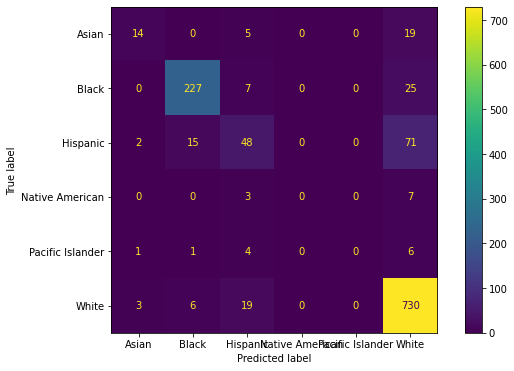

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

### Logistic Model GridsearchCV

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [ ]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'logistic': LogisticRegression(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l2", "none"]
C = [0.01, 0.1, 1, 5]
class_weight= ["balanced", None] 

# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = StratifiedKFold(n_splits = 10) #shuffle = True, random_state = 42

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   # Default olarak 1 sınıfının scorunu max. eder. 0 sınıfınınkini max. etmek isterseniz f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1,
                          return_train_score=True)

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [ ]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l2', 'none'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

## 2. SVC

### Vanilla SVC model 

###  SVC Model GridsearchCV

## 3. RF

### Vanilla RF Model

### RF Model GridsearchCV

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'imblearn'

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7376215262514891

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

(1, 232)


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___